## Set up

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2024-03-07 20:55:43.056831: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-07 20:55:43.084817: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 20:55:43.183741: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 20:55:43.183789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 20:55:43.198882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Using TensorFlow like NumPy

### Tensors and Operations

#### Tensors

In [2]:
t = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
t.shape

TensorShape([2, 3])

In [4]:
t.dtype

tf.float32

#### Indexing

In [5]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

#### Operations

In [7]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [9]:
tf.transpose(t)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [10]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

#### Scalars

In [11]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

#### Keras's low-level API

You can still run across code that uses Keras's low-level API

In [12]:
K = tf.keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

But now Keras does not support multiple backends anymore, you should instead use TF's low-level API directly instead.

In [13]:
tf.square(tf.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

### Tensors and NumPy

In [14]:
a = np.array([2.0, 4.0, 5.0])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [15]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [16]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [18]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Type Conversions

In [19]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 


In [20]:
try:
    tf.constant(2.0) + tf.constant(40.0, dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 


In [21]:
t2 = tf.constant(40.0, dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Variables

In [22]:
v = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [23]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [24]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [25]:
v[:, 2].assign(0.0, 1.0)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  0.]], dtype=float32)>

In [26]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100.0, 200.0])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [27]:
sparse_delta = tf.IndexedSlices(
    values=[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], indices=[1, 0]
)
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

In [28]:
try:
    v[1] = [7.0, 8.0, 9.0]
except TypeError as er:
    print(er)

'ResourceVariable' object does not support item assignment


### Other Data Structures

#### String arrays

In [29]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [30]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [31]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [32]:
b = tf.strings.unicode_encode(u, "UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [33]:
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [34]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [35]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

In [36]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [37]:
r = tf.strings.unicode_decode(p, "UTF-8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>

#### Ragged Tensors

`r` is a ragged tensor, and its ragged dimension is the second one.

In `r`, all of its element are regular tensors.

In [38]:
r[1]

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 67, 111, 102, 102, 101, 101], dtype=int32)>

In [39]:
# extra code - a slice of a ragged tensor is also a ragged tensor
r[1:3]

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>

In [40]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>

In [41]:
r3 = tf.ragged.constant([[68, 67, 69], [71], [], [72, 73]])
tf.concat([r, r3], axis=1)

<tf.RaggedTensor [[67, 97, 102, 233, 68, 67, 69], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>

In [42]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

#### Sparse Tensors

In [43]:
s = tf.SparseTensor(
    indices=[[0, 1], [1, 0], [2, 3]], values=[1.0, 2.0, 3.0], dense_shape=[3, 4]
)

In [44]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [45]:
s * 42.0

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 42.  84. 126.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [46]:
try:
    s + 42
except TypeError as er:
    print(er)

unsupported operand type(s) for +: 'SparseTensor' and 'int'


In [47]:
# Extra code - how to multiply a sparse tensor and a dense tensor
s4 = tf.constant([[10.0, 20.0], [30.0, 40.0], [50.0, 60.0], [70.0, 80.0]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [48]:
# Extra code - when creating a sparse tensor, values must be given in "reading order", or else `to_dense` will fail
s5 = tf.SparseTensor(
    indices=[[0, 2], [0, 1]], values=[1, 2], dense_shape=[3, 4]  # WRONG ORDER
)
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as er:
    print(er)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense] name: 


2024-03-05 20:17:52.991174: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_to_dense_op.cc:161 : INVALID_ARGUMENT: indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.




In [49]:
# Extra code - shows how to fix the sparse tensor s5 by reordering its values
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[0, 2, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)>

#### Tensor Arrays

In [50]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1.0, 2.0]))
array = array.write(1, tf.constant([3.0, 10.0]))
array = array.write(2, tf.constant([5.0, 7.0]))
tensor1 = array.read(1)  # returns (and zeros out) tf.constant([3.0, 10.0])

In [51]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [52]:
array2 = tf.TensorArray(dtype=tf.float32, size=3, clear_after_read=False)
array2 = array2.write(0, tf.constant([1.0, 2.0]))
array2 = array2.write(1, tf.constant([3.0, 10.0]))
array2 = array2.write(2, tf.constant([5.0, 7.0]))
tensor2 = array2.read(1)  # returns tf.constant([3.0, 10.0])
array2.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

In [53]:
# Extra code - shows how to create and use a tensor array with a dynamic size
array3 = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
array3 = array3.write(0, tf.constant([1.0, 2.0]))
array3 = array3.write(1, tf.constant([3.0, 10.0]))
array3 = array3.write(2, tf.constant([5.0, 7.0]))
tensor3 = array3.read(1)  # returns tf.constant([3.0, 10.0])
array3.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

#### Sets

In [54]:
a = tf.constant([[1, 5, 9]])
b = tf.constant([[5, 6, 9, 11]])
u = tf.sets.union(a, b)
u

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]], shape=(5, 2), dtype=int64), values=tf.Tensor([ 1  5  6  9 11], shape=(5,), dtype=int32), dense_shape=tf.Tensor([1 5], shape=(2,), dtype=int64))

In [55]:
tf.sparse.to_dense(u)

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[ 1,  5,  6,  9, 11]], dtype=int32)>

In [57]:
a = tf.constant([[1, 5, 9], [10, 0, 0]])
b = tf.constant([[5, 6, 9, 11], [13, 0, 0, 0]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [ 0, 10, 13,  0,  0]], dtype=int32)>

In [60]:
# Extra code shows how to use a different default value: -1 in this case
a = tf.constant([[1, 5, 9], [10, -1, -1]])
b = tf.constant([[5, 6, 9, 11], [13, -1, -1, -1]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u, default_value=-1)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [-1, 10, 13, -1, -1]], dtype=int32)>

In [64]:
# Extra code shows how to use `tf.sets.difference`
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [65]:
# Extra code shows how to use `tf.sets.intersection`
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

In [73]:
set1[:1]

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[2, 3, 5, 7]], dtype=int32)>

In [75]:
# Extra code checks whether set[0] contains 5
tf.sets.size(tf.sets.intersection(set1[:1], tf.constant([[5, 0, 0, 0]]))) > 0

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

#### Queues

In [77]:
q = tf.queue.FIFOQueue(3, [tf.int32, tf.string], shapes=[(), ()])
q.enqueue([10, b"windy"])
q.enqueue([15, b"sunny"])
q.size()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [78]:
q.dequeue()

[<tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'windy'>]

In [80]:
q.enqueue_many([[13, 16], [b"cloudy", b"rainy"]])

In [81]:
q.dequeue_many(3)

[<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15, 13, 16], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'sunny', b'cloudy', b'rainy'], dtype=object)>]

# Customizing Models and Training Algorithms

## Custom Loss Functions

In [4]:
def huber_fn(y_true, y_predict):
    error = y_true - y_predict
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

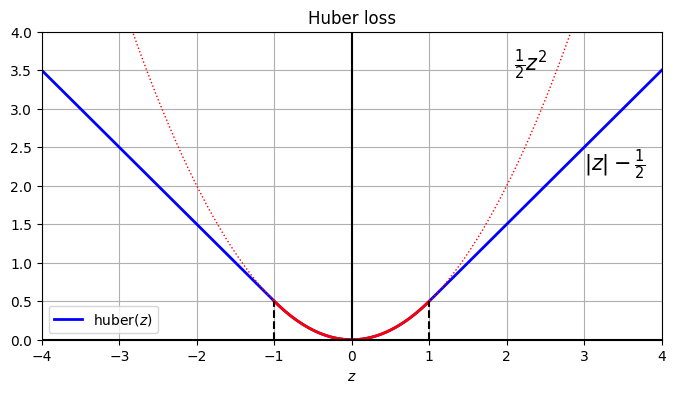

In [3]:
plt.figure(figsize=(8, 4))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "r:", linewidth=1)
plt.plot(z_center, huber_fn(0, z_center), "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0.0, -1.0)], "k--")
plt.plot([1, 1], [0, huber_fn(0.0, 1.0)], "k--")
plt.gca().axvline(0, color="k")
plt.gca().axhline(0, color="k")
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="k", fontsize=15)
plt.text(3.0, 2.2, r"$|z|-\frac{1}{2}$", color="k", fontsize=15)
plt.xlabel("$z$")
plt.title("Huber loss")
plt.grid()
plt.legend()
plt.axis([-4, 4, 0, 4])
plt.show()

To test our custom loss function, we will load the California housing dataset, create a model and train it using that loss function.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

In [5]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            10,
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=input_shape,
        ),
        tf.keras.layers.Dense(1),
    ]
)
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [6]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=2)

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 34.9464 - mae: 35.4306 - val_loss: 1.8724 - val_mae: 2.3194
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 1.4648 - mae: 1.8910 - val_loss: 1.4522 - val_mae: 1.9031


## Saving and Loading Models with Custom Objects 

In [7]:
# Extra code shows saving is fine
model.save("my_model_with_a_custom_loss")

INFO:tensorflow:Assets written to: my_model_with_a_custom_loss/assets


INFO:tensorflow:Assets written to: my_model_with_a_custom_loss/assets


In [5]:
model = tf.keras.models.load_model(
    "my_model_with_a_custom_loss", custom_objects={"huber_fn": huber_fn}
)

In [6]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


363/363 [==============================] - 5s 8ms/step - loss: 0.6574 - mae: 1.0410 - val_loss: 0.3704 - val_mae: 0.7147
Epoch 2/2
363/363 [==============================] - 2s 7ms/step - loss: 0.3237 - mae: 0.6560 - val_loss: 0.2800 - val_mae: 0.5975


In [3]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_predict):
        error = y_true - y_predict
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - tf.square(threshold) / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    return huber_fn

In [8]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [9]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


363/363 [==============================] - 3s 4ms/step - loss: 0.2996 - mae: 0.5692 - val_loss: 0.2961 - val_mae: 0.5478
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2588 - mae: 0.5244 - val_loss: 0.2459 - val_mae: 0.5041


In [10]:
model.save("my_model_with_a_custom_loss_threshold_2")

INFO:tensorflow:Assets written to: my_model_with_a_custom_loss_threshold_2/assets


INFO:tensorflow:Assets written to: my_model_with_a_custom_loss_threshold_2/assets


In [11]:
model = tf.keras.models.load_model(
    "my_model_with_a_custom_loss_threshold_2",
    custom_objects={"huber_fn": create_huber(2.0)},
)

In [12]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.2347 - mae: 0.4991 - val_loss: 0.2203 - val_mae: 0.4813
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2208 - mae: 0.4838 - val_loss: 0.2241 - val_mae: 0.4778


In [13]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_predict):
        error = y_true - y_predict
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - tf.square(self.threshold) / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [14]:
# Extra code to create another basic Keras model
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            30,
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=input_shape,
        ),
        tf.keras.layers.Dense(1),
    ]
)

In [15]:
model.compile(loss=HuberLoss(2.0), optimizer="nadam", metrics=["mae"])

In [16]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.6492 - mae: 0.8468 - val_loss: 0.5093 - val_mae: 0.6723
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2912 - mae: 0.5552 - val_loss: 0.3715 - val_mae: 0.5683


In [17]:
# Extra code shows saving works fine
model.save("my_model_with_a_custom_loss_class")

INFO:tensorflow:Assets written to: my_model_with_a_custom_loss_class/assets


INFO:tensorflow:Assets written to: my_model_with_a_custom_loss_class/assets


In [18]:
model = tf.keras.models.load_model(
    "my_model_with_a_custom_loss_class", custom_objects={"HuberLoss": HuberLoss}
)

In [19]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


363/363 [==============================] - 3s 4ms/step - loss: 0.2416 - mae: 0.5034 - val_loss: 0.2922 - val_mae: 0.5057
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2173 - mae: 0.4774 - val_loss: 0.2503 - val_mae: 0.4843


In [20]:
# Extra code - to show that the threshold is loaded properly
model.loss.threshold

2.0

## Other Custom Functions

In [21]:
# This function is equivalent to `tf.keras.activations.softplus()` or `tf.nn.softplus()`
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))

In [22]:
# This function is equivalent to `tf.keras.initializers.glorot_normal()`
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2.0 / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

In [23]:
# This function is equivalent to `tf.keras.regularizers.l1()`
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

In [24]:
# This function is equivalent to `tf.keras.constraints.nonneg()` or `tf.nn.relu()`
def my_positive_weights(weights):
    return tf.where(weights < 0.0, tf.zeros_like(weights), weights)

In [25]:
layer = tf.keras.layers.Dense(
    1,
    activation=my_softplus,
    kernel_initializer=my_glorot_initializer,
    kernel_regularizer=my_l1_regularizer,
    kernel_constraint=my_positive_weights,
)

In [26]:
# Extra code showing building, training, saving, loading and training again works fine with a model containing many custom parts
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            30,
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=input_shape,
        ),
        tf.keras.layers.Dense(
            1,
            activation=my_softplus,
            kernel_initializer=my_glorot_initializer,
            kernel_regularizer=my_l1_regularizer,
            kernel_constraint=my_positive_weights,
        ),
    ]
)
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.save("my_model_with_many_custom_parts")
model = tf.keras.models.load_model(
    "my_model_with_many_custom_parts",
    custom_objects={
        "my_l1_regularizer": my_l1_regularizer,
        "my_glorot_initializer": my_glorot_initializer,
        "my_positive_weights": my_positive_weights,
        "my_softplus": my_softplus,
    },
)
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 1.4714 - mae: 0.8316 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.8094 - mae: 0.6172 - val_loss: 2.6153 - val_mae: 0.6058
INFO:tensorflow:Assets written to: my_model_with_many_custom_parts/assets


INFO:tensorflow:Assets written to: my_model_with_many_custom_parts/assets
/home/daoxuantan/.local/lib/python3.10/site-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(
/home/daoxuantan/.local/lib/python3.10/site-packages/keras/src/regularizers.py:426: UserWarning: The `keras.regularizers.serialize()` API should only be used for objects of type `keras.regularizers.Regularizer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(
/home/daoxuantan/.local/lib/python3.10/site-packages/keras/src/constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'function'>, which may lead to improper se

Epoch 1/2
363/363 [==============================] - 3s 6ms/step - loss: 0.6333 - mae: 0.5617 - val_loss: 1.1687 - val_mae: 0.5468
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.5570 - mae: 0.5303 - val_loss: 1.0440 - val_mae: 0.5250


In [27]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(weights * self.factor))

    def get_config(self):
        return {"factor": self.factor}

In [28]:
# Extra code, again, showing that everything works fine, this time with our custom regularizer class
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            30,
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=input_shape,
        ),
        tf.keras.layers.Dense(
            1,
            activation=my_softplus,
            kernel_initializer=my_glorot_initializer,
            kernel_regularizer=MyL1Regularizer(0.01),
            kernel_constraint=my_positive_weights,
        ),
    ]
)
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.save("my_model_with_many_custom_parts")
model = tf.keras.models.load_model(
    "my_model_with_many_custom_parts",
    custom_objects={
        "MyL1Regularizer": MyL1Regularizer,
        "my_glorot_initializer": my_glorot_initializer,
        "my_positive_weights": my_positive_weights,
        "my_softplus": my_softplus,
    },
)
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 1.4714 - mae: 0.8316 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.8094 - mae: 0.6172 - val_loss: 2.6153 - val_mae: 0.6058
INFO:tensorflow:Assets written to: my_model_with_many_custom_parts/assets


INFO:tensorflow:Assets written to: my_model_with_many_custom_parts/assets
/home/daoxuantan/.local/lib/python3.10/site-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(
/home/daoxuantan/.local/lib/python3.10/site-packages/keras/src/constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(


Epoch 1/2
363/363 [==============================] - 4s 7ms/step - loss: 0.6333 - mae: 0.5617 - val_loss: 1.1687 - val_mae: 0.5468
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.5570 - mae: 0.5303 - val_loss: 1.0440 - val_mae: 0.5250


## Custom Metrics

In [4]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            30,
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=input_shape,
        ),
        tf.keras.layers.Dense(1),
    ]
)

In [6]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [7]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 4s 5ms/step - loss: 1.7474 - huber_fn: 0.6846
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.7843 - huber_fn: 0.3136


### Streaming metrics

In [9]:
# precision requires two arguments: first, the y_predict, then the y_true
precision = tf.keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [10]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [11]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [12]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [13]:
precision.reset_states()

In [23]:
class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")

    def update_state(self, y_true, y_predict, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_predict)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

**Extra material** – the rest of this section tests the `HuberMetric` class and shows another implementation subclassing `tf.keras.metrics.Mean`.

In [15]:
m = HuberMetric(2.0)
# total = 2 * |10 - 2| - 2 ** 2 / 2
# count = 1
# result = 14 / 1 = 14
m(tf.constant([2.0]), tf.constant([10.0]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [16]:
# total = total + (|1 - 0|)**2 / 2 + 2 * (|9.25 - 5|) - 2**2 / 2 = 21
# count = count + 2 = 3
# result = total / count = 7
m(tf.constant([[0.0], [5.0]]), tf.constant([[1.0], [9.25]]))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [17]:
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [18]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [19]:
m.reset_state()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

Here we check if the `HuberMetric` class works well.

In [20]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            30,
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=input_shape,
        ),
        tf.keras.layers.Dense(1),
    ]
)

In [24]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

In [25]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.6492 - huber_metric_6: 0.6492
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2912 - huber_metric_6: 0.2912


In [26]:
model.save("my_model_with_a_custom_metric")

INFO:tensorflow:Assets written to: my_model_with_a_custom_metric/assets


INFO:tensorflow:Assets written to: my_model_with_a_custom_metric/assets


In [27]:
model = tf.keras.models.load_model(
    "my_model_with_a_custom_metric",
    custom_objects={"huber_fn": create_huber(2.0), "HuberMetric": HuberMetric(2.0)},
)

In [28]:
model.fit(X_train_scaled, y_train)

363/363 [==============================] - 3s 4ms/step - loss: 0.2416 - huber_metric_6: 0.2416


`model.metrics` contains the model's loss followed by the model's metric(s), so the `HuberMetric` is `model.metrics[-1]`.

In [29]:
model.metrics[-1].threshold

2.0

Looks like it work fine! More simply, we could create the class like this:

In [35]:
class HuberMetric(tf.keras.metrics.Mean):
    def __init__(self, threshold=1.0, name="HuberMetric", dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_predict, sample_weight=None):
        metric = self.huber_fn(y_true, y_predict)
        super(HuberMetric, self).update_state(metric, sample_weight)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

This class handles shape better, and it also supports sample weights.

In [33]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            30,
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=input_shape,
        ),
        tf.keras.layers.Dense(1),
    ]
)

In [36]:
model.compile(
    loss=tf.keras.losses.Huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)]
)

In [37]:
np.random.seed(42)
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.3272 - HuberMetric: 0.6663
Epoch 2/2
363/363 [==============================] - 2s 4ms/step - loss: 0.1449 - HuberMetric: 0.2957


In [38]:
(history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean())

(0.3272010087966919, 0.33064658269437275)

In [39]:
model.save("my_model_with_a_custom_metric_v2")

INFO:tensorflow:Assets written to: my_model_with_a_custom_metric_v2/assets


INFO:tensorflow:Assets written to: my_model_with_a_custom_metric_v2/assets


In [40]:
model = tf.keras.models.load_model(
    "my_model_with_a_custom_metric_v2", custom_objects={"HuberMetric": HuberMetric}
)

In [41]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 3s 4ms/step - loss: 0.2442 - HuberMetric: 0.2442
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2184 - HuberMetric: 0.2184


In [42]:
model.metrics[-1].threshold

2.0

## Custom Layers

In [3]:
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))

In [4]:
# Extra code - like any layers, it can be used as a function:
exponential_layer([-1.0, 0.0, 1.0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [5]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(30, activation="relu", input_shape=input_shape),
        tf.keras.layers.Dense(1),
        exponential_layer,
    ]
)
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5


363/363 [==============================] - 1s 1ms/step - loss: 0.7784 - val_loss: 0.4393
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5702 - val_loss: 0.4094
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4431 - val_loss: 0.3760
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4984 - val_loss: 0.3785
Epoch 5/5
162/162 [==============================] - 0s 716us/step - loss: 0.3781


0.3781099021434784

Alternately, it's often preferable to replace the targets with the logarithms of the targets (and use no activation function in the output layer).

In [6]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel",
            shape=[batch_input_shape[-1], self.units],
            initializer="he_normal",
        )
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros"
        )

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def get_config(self):
        base_config = super().get_config()
        return base_config | {
            "units": self.units,
            "activation": tf.keras.activations.serialize(self.activation),
        }

In [7]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [MyDense(30, activation="relu", input_shape=input_shape), MyDense(1)]
)
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)
model.save("my_model_with_a_custom_layer")

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 3.1183 - val_loss: 6.9549
Epoch 2/2
162/162 [==============================] - 0s 760us/step - loss: 0.7039
INFO:tensorflow:Assets written to: my_model_with_a_custom_layer/assets


INFO:tensorflow:Assets written to: my_model_with_a_custom_layer/assets


In [8]:
model = tf.keras.models.load_model(
    "my_model_with_a_custom_layer", custom_objects={"MyDense": MyDense}
)
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5945 - val_loss: 0.5318
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.4712 - val_loss: 0.5751


In [9]:
class MyMultiLayer(tf.keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape, "X2.shape: ", X2.shape)
        return X1 + X2, X1 * X2, X1 / X2

Our custom layer can be called using the functional API like this:

In [11]:
# Extra code tests MyMultiLayer with symbolic inputs
inputs1 = tf.keras.layers.Input(shape=[2])
inputs2 = tf.keras.layers.Input(shape=[2])
MyMultiLayer()([inputs1, inputs2])

X1.shape:  (None, 2) X2.shape:  (None, 2)


(<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer')>)

Note that the `call()` method receives symbolic inputs, and it returns symbolic outputs. The shapes are only partially specified at this stage: we don't know the batch size, hence the first dimension is `None`.

We can also pass actual data to the custom layer.

In [12]:
# Extra code tests MyMultiLayer with actual data
X1, X2 = np.array([[3.0, 6.0], [2.0, 7]]), np.array([[6.0, 12.0], [4.0, 3.0]])
MyMultiLayer()([X1, X2])

X1.shape:  (2, 2) X2.shape:  (2, 2)


(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 9., 18.],
        [ 6., 10.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[18., 72.],
        [ 8., 21.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.5      , 0.5      ],
        [0.5      , 2.3333333]], dtype=float32)>)

Here we define a layer with different behaviors during training and testing.

In [13]:
class MyGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

In [14]:
# Extra code - a simple model to test MyGaussianNoise
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential(
    [
        MyGaussianNoise(stddev=1.0, input_shape=input_shape),
        tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(1),
    ]
)
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.2220 - val_loss: 25.1506
Epoch 2/2
162/162 [==============================] - 0s 901us/step - loss: 1.1059


1.1058681011199951

## Custom Models

In [15]:
class ResidualLayer(tf.keras.layers.Layer):
    def __init__(self, n_neurons, n_layers, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [
            tf.keras.layers.Dense(
                n_neurons, activation="relu", kernel_initializer="he_normal"
            )
            for _ in range(n_layers)
        ]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [16]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(
            30, activation="relu", kernel_initializer="he_normal"
        )
        self.block1 = ResidualLayer(30, 2)
        self.block2 = ResidualLayer(30, 2)
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [17]:
# Extra code shows that this model can be used normally
tf.keras.utils.set_random_seed(42)
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)
model.save("my_custom_model")

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 32.7847 - val_loss: 2.0883
Epoch 2/2
162/162 [==============================] - 0s 969us/step - loss: 1.1603
INFO:tensorflow:Assets written to: my_custom_model/assets


INFO:tensorflow:Assets written to: my_custom_model/assets


In [18]:
# Extra code - The model can be loaded, continue to train, and make predictions
model = tf.keras.models.load_model("my_custom_model")
model.fit(X_train_scaled, y_train, epochs=2)
model.predict(X_test_scaled[:3])

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 1.3391
Epoch 2/2
1/1 [==============================] - 0s 53ms/step


array([[0.9594824],
       [1.2642186],
       [4.3033   ]], dtype=float32)

We could have defined the model using the Sequential API instead:

In [19]:
tf.keras.utils.set_random_seed(42)
block1 = ResidualLayer(30, 2)
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal"),
        block1,
        block1,
        block1,
        block1,
        ResidualLayer(30, 2),
        tf.keras.layers.Dense(1),
    ]
)

## Losses and Metrics Based on Model Internals

In [17]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [
            tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")
            for _ in range(5)
        ]
        self.out = tf.keras.layers.Dense(output_dim)
        self.reconstruction_mean = tf.keras.metrics.Mean(name="reconstruction_error")

    def build(self, input_shape):
        n_inputs = input_shape[-1]
        self.reconstruct_layer = tf.keras.layers.Dense(n_inputs)

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct_layer(Z)
        reconstruction_error = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * reconstruction_error)
        if training:
            reconstruction_mean = self.reconstruction_mean(reconstruction_error)
            self.add_metric(reconstruction_mean)
        return self.out(Z)

In [18]:
# Extra code
tf.keras.utils.set_random_seed(42)
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=5)
model.predict(X_test_scaled)

Epoch 1/5
363/363 [==============================] - 2s 1ms/step - loss: 0.8198 - reconstruction_error: 1.0892
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4778 - reconstruction_error: 0.5583
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.4419 - reconstruction_error: 0.4227
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.3852 - reconstruction_error: 0.3587
Epoch 5/5
162/162 [==============================] - 0s 537us/step


array([[0.71545696],
       [1.6242564 ],
       [4.648498  ],
       ...,
       [1.3749878 ],
       [3.0660133 ],
       [4.349777  ]], dtype=float32)